# KMeans Clustering for Ethereum Transaction Analysis

This notebook demonstrates unsupervised learning using the KMeans algorithm to identify patterns and potential anomalies in Ethereum transaction data.

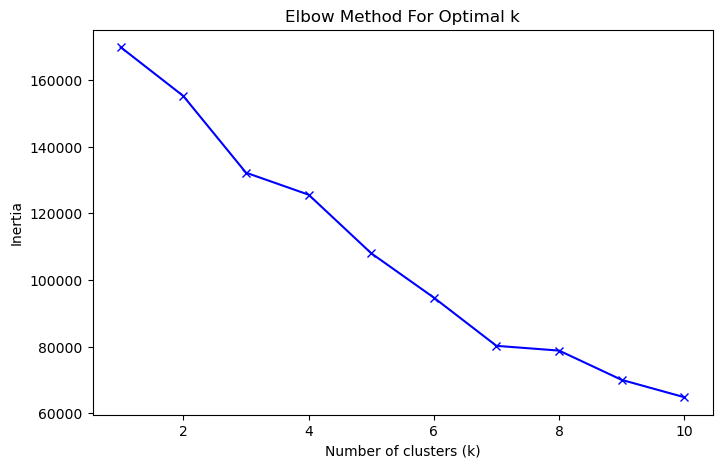

KMeans clustering labels: [0 0 0 ... 0 0 0]
Cluster centers (scaled): [[-2.93511065e-04  3.15730454e-04  4.32161927e-04 -2.52959397e-03
  -2.48327791e-02 -6.06167888e-03 -1.20280897e-02 -1.27957900e-02
  -1.30351845e-02 -1.66178923e-03 -4.23271659e-04  1.16371582e-03]
 [-1.89015831e-01 -2.98366832e-01 -3.57779103e-01 -9.88040558e-02
  -9.32103031e-02  7.36753331e+01  1.17271712e+02 -4.22746998e-02
   1.98155824e+00  8.54925943e+00  5.57641731e+00 -1.68041173e+01]
 [ 5.19769536e-01 -2.98676542e-01 -4.84235787e-01  1.85469743e+01
   1.00030774e+01  3.10341846e-01  1.45978511e+00  7.13555464e+01
   3.99735411e+01  4.18183969e+00  8.40478436e-02  1.13892372e-01]
 [ 2.74976935e-01 -2.97392392e-01 -3.98709914e-01 -1.02223816e-01
   2.76018793e+01  9.51343548e-01  4.15715889e+00  3.18863766e+00
   8.53240573e+00  5.48730080e-01  2.00456889e-02  1.01158986e-02]]


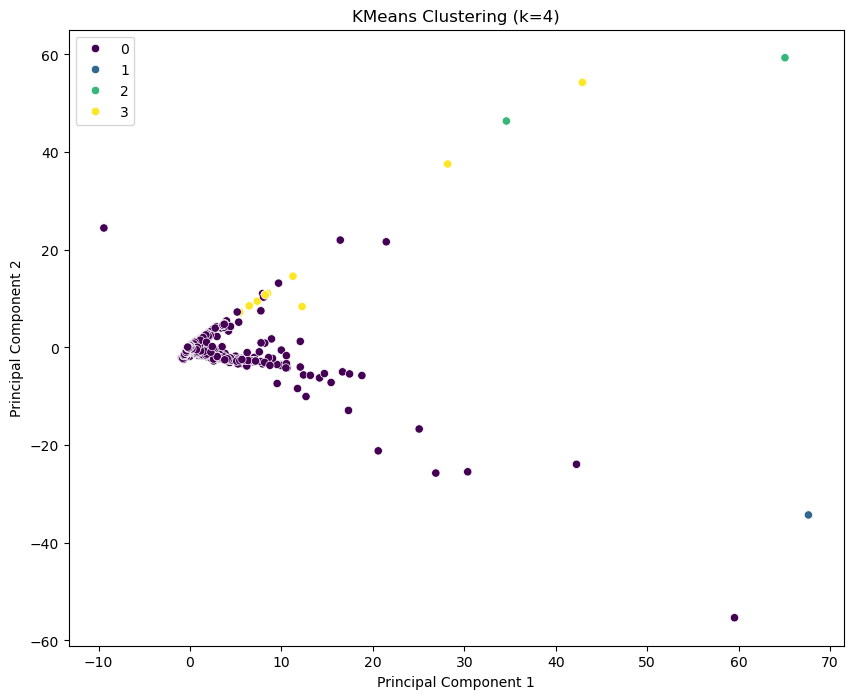

In [6]:
# Import additional libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data_path = '../Data/address_data_combined.csv'
df = pd.read_csv(data_path)

# Select numeric features and drop potential label/identifier columns
feature_df = df.select_dtypes(include=['float64', 'int64'])
cols_to_drop = ['FLAG', 'is_fraud', 'label', 'address', 'Address', 'time', 'timestamp', 'block_number']
feature_df = feature_df.drop(columns=cols_to_drop, errors='ignore')

# Handle missing values
for col in feature_df.columns:
    if feature_df[col].isnull().sum() > 0:
        feature_df[col].fillna(feature_df[col].median(), inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(feature_df)

# Determine the optimal number of clusters using the Elbow method
inertia = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=0).fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Choose optimal k based on the Elbow plot (e.g., k = 4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=0).fit(X_scaled)
labels = kmeans.labels_

print(f"KMeans clustering labels: {labels}")
print(f"Cluster centers (scaled): {kmeans.cluster_centers_}")

# Visualize the clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10,8))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette='viridis', legend='full')
plt.title(f'KMeans Clustering (k={optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()